In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sb

In [2]:
df  = pd.read_csv("survey.csv",index_col=0, na_values=["NaN",])
df.dropna(axis=0,inplace=True)
df.head()


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-08-27 11:36:48,33,male,United States,CA,No,Yes,Yes,Rarely,26-100,No,...,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
2014-08-27 11:37:08,35,male,United States,TN,No,Yes,Yes,Sometimes,More than 1000,No,...,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
2014-08-27 11:39:36,42,Male,United States,WA,No,Yes,Yes,Sometimes,26-100,Yes,...,Very easy,Maybe,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
2014-08-27 11:43:36,38,Female,United States,TX,No,Yes,Yes,Sometimes,26-100,No,...,Somewhat easy,No,No,Some of them,Yes,No,No,Yes,No,Our health plan has covered my psychotherapy a...
2014-08-27 11:44:43,30,male,United States,IL,No,Yes,Yes,Rarely,26-100,No,...,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No,I just started a new job last week hence a lot...


In [3]:
working_data = df[["Age","Gender","family_history","remote_work","treatment"]]
working_data.is_copy = False
working_data["Gender"] = working_data["Gender"].map({
    "male":0,
    "Male":0,
    "M":0,
    "female":1,
    "Female":1,
    "F":1,  
})
working_data["Gender"] = working_data["Gender"]
working_data["family_history"] = working_data["family_history"].map({
    "Yes":1,
    "No":0, 
})
working_data["remote_work"] = working_data["remote_work"].map({
    "Yes":1,
    "No":0, 
})
working_data["treatment"] = working_data["treatment"].map({
    "Yes":1,
    "No":0, 
})
working_data.dropna(axis=0,inplace=True)
working_data.reset_index()
working_data.head()

C:\Users\rinko\AppData\Local\Temp/ipykernel_6964/507328212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data["Gender"] = working_data["Gender"].map({
C:\Users\rinko\AppData\Local\Temp/ipykernel_6964/507328212.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data["Gender"] = working_data["Gender"]
C:\Users\rinko\AppData\Local\Temp/ipykernel_6964/507328212.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,Age,Gender,family_history,remote_work,treatment
Timestamp,,,,,
2014-08-27 11:36:48,33,0.0,1,0,1
2014-08-27 11:37:08,35,0.0,1,0,1
2014-08-27 11:39:36,42,0.0,1,1,1
2014-08-27 11:43:36,38,1.0,1,0,1
2014-08-27 11:44:43,30,0.0,1,0,1


<AxesSubplot:>

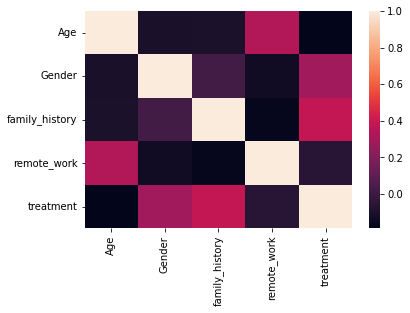

In [4]:
sb.heatmap(working_data.corr())

C:\Users\rinko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='family_history', ylabel='treatment'>

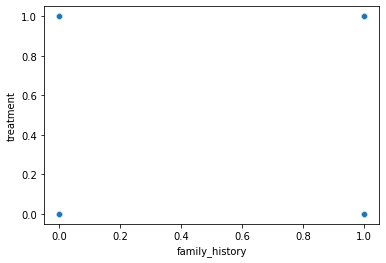

In [5]:
sb.scatterplot(working_data["family_history"],working_data["treatment"])

In [6]:
data = np.array(working_data[["Age","Gender","family_history","remote_work"]])

kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(data)
kmeans.cluster_centers_.shape


(10, 4)